In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio

from gw_chart import calibracion, budgets, farm, parselas, Area_plot

In [2]:
class GW_chart:
    """
    Clase para reemplazar a GW_chart. Cada método es un tipo de gráfica.
    """
        
    def __init__(self, LaTeX = True):
        
        """
        LaTeX: bool, opcional, default: True
        Si LaTeX = True hacemos las gráficas con un formato de LaTeX.
        """
        self.LaTeX = LaTeX
        
        if self.LaTeX:
            plt.rc('text', usetex=True)
            plt.rc('font', family='serif')
        else:
            plt.rc('text', usetex=False)
            plt.rc('font', family='serif')
    
    def coordinates(self, Ca, Mg, Cl, SO4, label, s):
        """
        Función auxiliar para poner las coordenadas en el piper diagram.
        """
        x_cation = 40 + 360 - (Ca + Mg/2)*3.6
        y_cation = 40 + (np.sqrt(3)*Mg/2)*3.6
        x_anion = 40 + 360 + 100 + (Cl + SO4/2)*3.6
        y_anion = 40 + (SO4*np.sqrt(3)/2)*3.6
        x_diam = 0.5*(x_cation + x_anion + (y_anion - y_cation)/np.sqrt(3))
        y_diam = 0.5*(y_anion + y_cation + np.sqrt(3)*(x_anion - x_cation))
               
        plt.scatter(x_cation, y_cation, zorder = 1, s = s, label = label)
        plt.scatter(x_anion, y_anion, zorder = 1, s = s)
        plt.scatter(x_diam, y_diam, zorder = 1, s = s)
            
    def piper_diagram(self, data, figsize = (10,10), s = 10.0):
        """
        data: pandas.DataFrame
        DataFrame de pandas que contiene los datos a graficar, la primera columna
        debe contener el nombre de las estaciones y el resto de las columnas deben
        ser valores numéricos con las concentraciones de Ca, Mg, Cl y S04.
        
        figsize: (float, float), opcional, default: (10,10).
        Controla el tamaño de la figura.
        
        s: float, opcional, default: 10.0
        Controla el tamaño de los puntos.
        """
        img = np.flipud(imageio.imread("Data/piper_template.png"))
        
        piper = plt.figure(figsize = figsize)
        plt.imshow(img, zorder = 0)
        
        for i in data.index:
            row = data.loc[i]
            self.coordinates(row['Ca'], row['Mg'], row['Cl'], row['SO4'], row['Estación'], s)
            
        plt.ylim(0,900)
        plt.xlim(0,900)
        plt.axis('off')
        plt.legend(loc = 'upper right', frameon = False)
        
        return piper
    
    def hydrograph(self, data, figsize = (14,7), xlab = 'Fechas', ylab = 'Dercarga diaria (m$^{3}$/s)',
                   step = 30, fontlabs = 14, fontlegend = 12):
        """
        data: pandas.DataFrame
        DataFrame de pandas que contiene los datos a graficar, la primera columna
        debe contener las fechas diarias y el resto de las columnas deben ser valores
        numéricos con los datos de los ríos.
        
        figsize: (float, float), opcional, default: (14,7).
        Controla el tamaño de la figura.
        
        xlab: str, opcional, default: 'Fechas'.
        Etiqueta del eje x.
        
        ylab: str, opcional, default: 'Dercarga diaria (ft$^{3}$/s)'.
        Etiqueta del eje y.
        
        step: int, opcional, default: 96
        Cada cuanto se imprime una xtick.
        
        fontlabs: int, opcional, default: 14.
        Tamaño de la etiqueta de los ejes x&y.
        
        fontlegend: int, opcional, default: 12.
        Tamaño de las leyendas.
        
        """
               
        columns = data.columns.to_list()
                
        hydro = plt.figure(figsize = figsize)
        
        for river in columns[1:]:
            plt.plot(data[columns[0]], data[river], label = river)     
            
        plt.xticks(rotation = 45)
        plt.xticks(np.arange(0, len(data), step = step))
        
        if self.LaTeX:
            plt.xlabel(r'\textbf{' + xlab + '}', fontsize = fontlabs)
            plt.ylabel(r'\textbf{' + ylab + '}', fontsize = fontlabs)
        else:
            plt.xlabel(xlab, fontsize = fontlabs)
            plt.ylabel(ylab, fontsize = fontlabs)
        
        plt.legend(loc = 'best', fontsize = fontlegend)
        plt.grid()             
        
        return hydro
    
    def lake_plot(self, data, figsize = (14,7), xlab = 'Fechas', ylab = 'Almacenamiento (m$^{3}$)', 
                  step = 96, fontlabs = 14, fontlegend = 12):
            """
            data: pandas.DataFrame
            DataFrame de pandas que contiene los datos a graficar, la primera columna
            debe contener las fechas/horas y el resto de las columnas deben ser valores
            numéricos con los datos de los lagos.

            figsize: (float, float), opcional, default: (14,7).
            Controla el tamaño de la figura.

            xlab: str, opcional, default: 'Fechas'.
            Etiqueta del eje x.

            ylab: str, opcional, default: 'Almacenamiento (m$^{3}$)'.
            Etiqueta del eje y.
            
            step: int, opcional, default: 96
            Cada cuanto se imprime una xtick.

            fontlabs: int, opcional, default: 14.
            Tamaño de la etiqueta de los ejes x&y.

            fontlegend: int, opcional, default: 12.
            Tamaño de las leyendas.

            """

            columns = data.columns.to_list()

            lakes = plt.figure(figsize = figsize)

            for lake in columns[1:]:
                plt.plot(data[columns[0]], data[lake], label = lake)     

            plt.xticks(rotation = 45)
            plt.xticks(np.arange(0, len(data), step = step))

            plt.xlabel(r'\textbf{' + xlab + '}', fontsize = fontlabs)
            plt.ylabel(r'\textbf{' + ylab + '}', fontsize = fontlabs)

            plt.legend(loc = 'best', fontsize = fontlegend)
            plt.grid()             

            return lakes
        
    def calibration_plot(self, datos, tamano_figura = (16, 8), columnas = 1, titulo = "Calibración", 
                 ejes_graficas = [], etiquetas = [], marca = None):
        """
        datos: ndarray
        Datos a graficar.
        
        tamano_figura: (float, float), opcional, default: (16,8).
        Controla el tamaño de la figura.
        
        columnas, int, opcional, default:1
        Número de columnas en la gráfica.
        
        titulo: str, opcional, default: 'Calibración'
        
        ejes_graficas: array, opcional, default: []
        Array donde se guardan los nombres de los ejes.
        
        etiquetas: array, opcional, default: []
        Array donde se guardan los nombres de las subgráficas
        
        marca: str, opcional, default:None
        Marcador que se se usa en las gráficas, si marca=None por default se usa 'o'.        
        
        """
            
        calibration = calibracion(datos, tamano_figura, columnas, titulo, 
                                      ejes_graficas, etiquetas, marca)    
        
        calibration.plot_line()
        
    def budget_plot(self, datos, tamano_figura = (16, 8), columnas = 1, titulo = "Presupuestos Celdas", 
                 ejes_graficas = [], etiquetas = [], marca = None):
        
        """
        datos: ndarray
        Datos a graficar.
        
        tamano_figura: (float, float), opcional, default: (16,8).
        Controla el tamaño de la figura.
        
        columnas, int, opcional, default:1
        Número de columnas en la gráfica.
        
        titulo: str, opcional, default: 'Presupuestos Celdas'
        
        ejes_graficas: array, opcional, default: []
        Array donde se guardan los nombres de los ejes.
        
        etiquetas: array, opcional, default: []
        Array donde se guardan los nombres de las subgráficas
        
        marca: str, opcional, default:None
        Marcador que se se usa en las gráficas, si marca=None por default se usa 'o'.        
        
        """
        
        cell_budget = budgets(datos, tamano_figura, columnas, titulo,
                         ejes_graficas, etiquetas, marca)
        
        cell_budget.plot_line_overlapped()
        
    def farm_plot(self, datos, tamano_figura = (16, 8), columnas = 1, titulo = "Presupuesto de granja", 
                 ejes_graficas = [], etiquetas = [], marca = None):
        
        """
        datos: ndarray
        Datos a graficar.
        
        tamano_figura: (float, float), opcional, default: (16,8).
        Controla el tamaño de la figura.
        
        columnas, int, opcional, default:1
        Número de columnas en la gráfica.
        
        titulo: str, opcional, default: 'Presupuesto de granja'
        
        ejes_graficas: array, opcional, default: []
        Array donde se guardan los nombres de los ejes.
        
        etiquetas: array, opcional, default: []
        Array donde se guardan los nombres de las subgráficas
        
        marca: str, opcional, default:None
        Marcador que se se usa en las gráficas, si marca=None por default se usa 'o'.        
        
        """
        
        
        farm_budget = farm(datos, tamano_figura, columnas, titulo,
                         ejes_graficas, etiquetas, marca)
        
        farm_budget.plot_line_overlapped()
        
    def water_budget(self, x, y, n_x_m, alto_x_ancho = [3,3], titulo = 'Título principal'):
        
        """
        x: array
        Array con los datos a graficar en el eje x.
        
        y: array
        Array con los datos a graficar en el eje y.
        
        n_x_m: array
        Array con el número de subplots que contiene la gráfica, por ejemplo,
        n_x_m = [2,2] crea un arreglo de 2x2 subgráficas.
        
        alto_x_ancho: array, opcional, default = [3,3]
        Tamaño de cada subgráfica
        
        titulo: str, opcional, default: 'Título principal'
        
        """
        
        water_plot = parselas(n_x_m, alto_x_ancho, titulo)
        water_plot.plot_area((0,0), Area_plot, x, y)
        water_plot.show()        

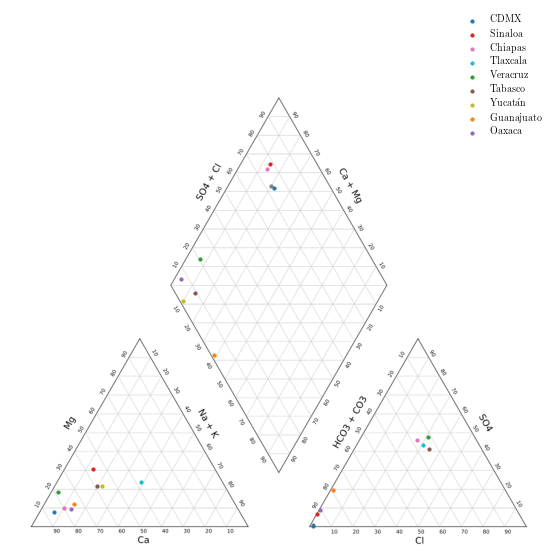

In [4]:
data = pd.read_csv('Data/data_piper.csv')

grafica = GW_chart()
piper = grafica.piper_diagram(data = data)

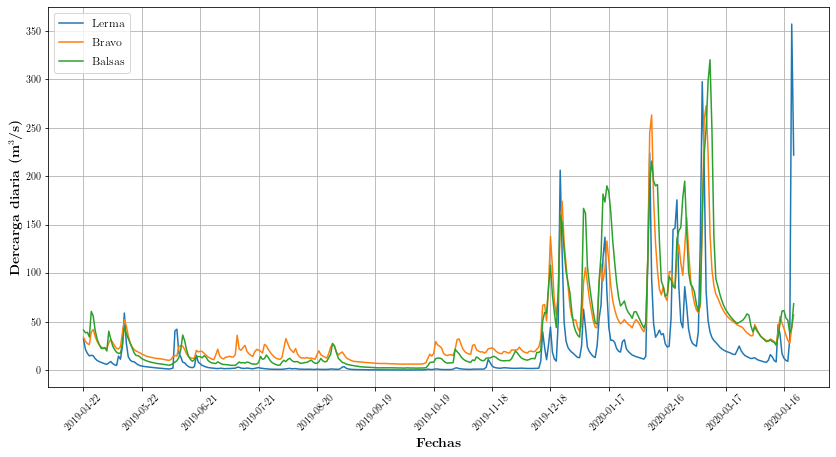

In [5]:
data_hydro = pd.read_csv('Data/data_hydrograph.csv')

grafica = GW_chart(LaTeX = True)
hydro = grafica.hydrograph(data = data_hydro)

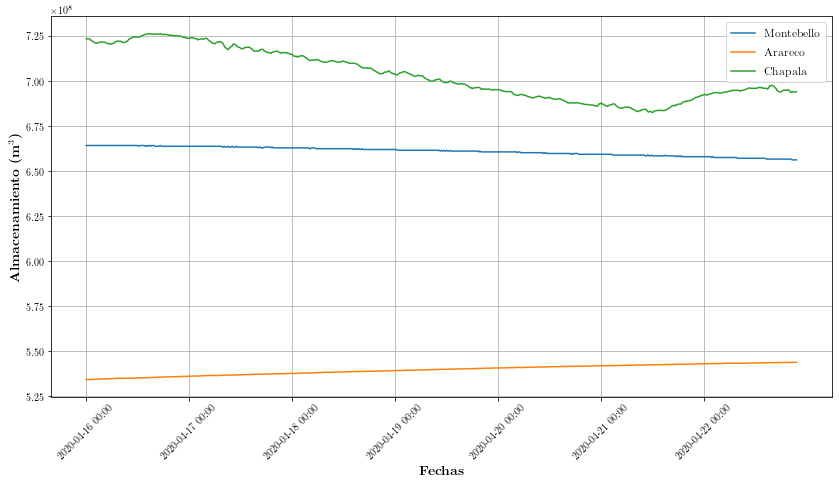

In [6]:
data_lake = pd.read_csv('Data/data_lake.csv')

grafica = GW_chart(LaTeX = True)
lake = grafica.lake_plot(data = data_lake)

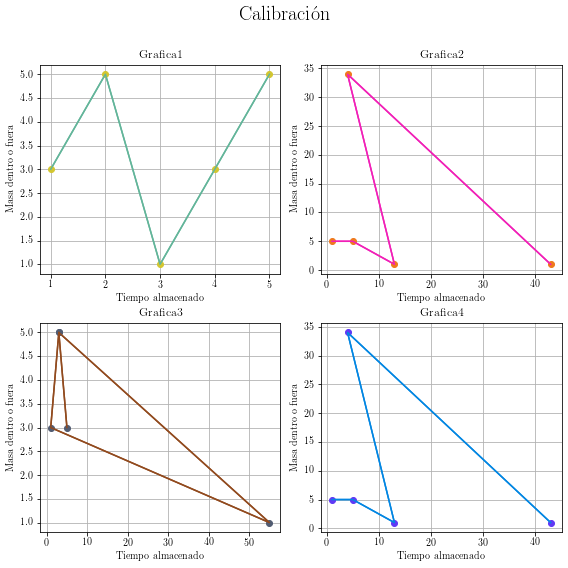

In [7]:
datos = [([1,2,3,4,5],[3,5,1,3,5]), ([43,4,13,5,1],[1,34,1,5,5]), ([5,3,55,1,3],[3,5,1,3,5]), ([43,4,13,5,1],[1,34,1,5,5])]

grafica = GW_chart(LaTeX = True)
grafica.calibration_plot(datos, columnas = 2,   tamano_figura = (8,8), marca = 'o')

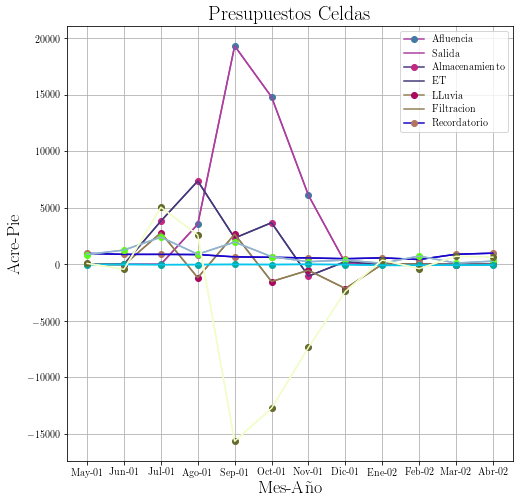

In [8]:
datos= [(["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
         [1,0,2,3540,19335,14812,6107,111,3,-1,-47,7]),
       (["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
        [0, 0, 3824,7371,2322,3680,-1051,238,0,0,0,0]),
       (["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
        [13,-51,2787,-1192,2669,-1528,-530,-2146,-5,7,-41,-14]),
       (["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
        [959, 875, 876, 860, 655, 616, 560, 492, 566, 421, 886, 982]),
       (["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
        [863,1257,2401,887,1966,671,229,370,86,727,107,275]),
       (["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
        [-30,-15,-36,-28,-15,-24,-8,-27,-99,-94,-79,-57]),
       (["May-01", "Jun-01","Jul-01","Ago-01","Sep-01","Oct-01","Nov-01","Dic-01","Ene-02","Feb-02","Mar-02","Abr-02"],
        [76,-448,5048,2585,-15669,-12739,-7365,-2400,372,-391,706,629])]
nombre = [("Afluencia"), ("Salida"),("Almacenamiento"),("ET"),("LLuvia"),("Filtracion"),("Recordatorio")]

grafica = GW_chart(LaTeX = True)
grafica.budget_plot(datos, columnas = 2, etiquetas = nombre,  tamano_figura = (8,8), marca = 'o')

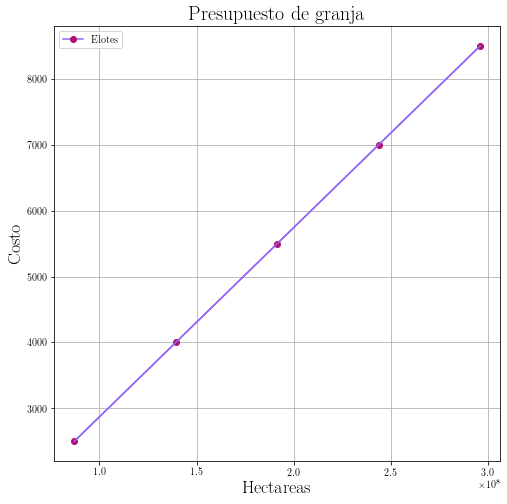

In [9]:
datos= [([87089625,139343400,191597175,243850950,296104725],[2500,4000,5500,7000,8500]),
        ]
nombre = [("Elotes")]

grafica = GW_chart(LaTeX = True)
grafica.farm_plot(datos, columnas = 2, etiquetas = nombre,  tamano_figura = (8,8), marca = 'o')

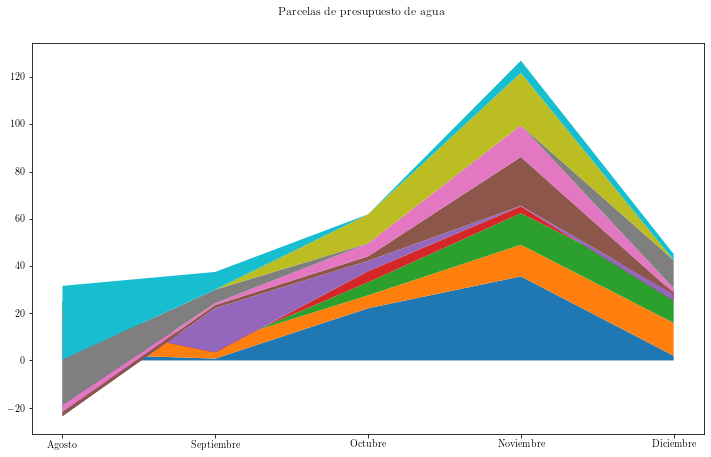

In [10]:
x = [("Agosto"), ("Septiembre"), ("Octubre"), ("Noviembre"),("Diciembre")]
lluvia = [2.9, 0.8, 22.1, 35.6, 2.0]
evaporacion_forestal = [22.2, 6.5, 5.5, 13.4, 13.9]
ganancia_perdida_0_10 = [-4.7, -1.8, 5.5, 13.4, 13.9 ]
ganancia_perdida_10_40=[-4.0, -2.1, 4.7, 2.9, -4.6 ]
ganancia_perdida_40_60 = [-40,18.8,4.4,0.2,3.0]
ganancia_perdida_60_80 =[1.8,1.3,1.9,20.7,0.4]
evaporacion_lluvia = [2.9,0.8,5.5,13.4,2.0]
evaporacion_contenida_suelo = [19.3,5.7,0,0,11.9]
humedad_del_suelo_lluvia=[0,0,12.3,22.2,0]
congelamiento_del_suelo= [31.2,7.5,0,5.2,2.6]

y = np.vstack([lluvia, evaporacion_forestal,ganancia_perdida_0_10,ganancia_perdida_10_40,
              ganancia_perdida_40_60, ganancia_perdida_60_80,evaporacion_lluvia,evaporacion_contenida_suelo,
              humedad_del_suelo_lluvia,congelamiento_del_suelo])

grafica = GW_chart(LaTeX = True)
grafica.water_budget(x, y, [1, 1], titulo = 'Parcelas de presupuesto de agua')


## Referencias

[Piper diagram](https://www.hatarilabs.com/ih-en/how-to-make-a-piper-diagram-in-python-tutorial)

[USGS Current Water Data for the Nation](https://waterdata.usgs.gov/nwis/rt)